# **DATOS HISTÓRICOS DE BITCOIN**

**DATASET**  https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data  
  
**Integrantes:**  
  
- Sebastián Carrera  
- Yasna Villarroel  
- Kevin Vivanco  
## **Contexto del dataset** 
*Este dataset contiene información de la criptomoneda bitcoin, la información es desde el 01/01/2012 hasta mas o menos el 09/09/2025 (Aqui lo descargué, este dataset se actualiza a diario al parecer), entre las variables que podemos encontrar es la fecha en formato UNIX "Timestamp", valor de apertura "Open", el valor más alto "High", el valor mas bajo "Low", el valor de cierre "Close", Volumen transaccionado "Volume". Este dataset se maneja en ventanas de 1 minuto por lo que tiene la información completa, la idea es inicialmente transformarlo a dia para reducir la cantidad de valores a trabajar.*  
  
**Importancia:**
Este análisis es relevante porque permite comprender la evolución del precio de Bitcoin a lo largo del tiempo, identificar tendencias, ciclos y variaciones significativas. Con ello es posible evaluar si el paso del tiempo tiene algún efecto medible en el valor de cierre, lo cual es esencial desde una perspectiva estadística y para entender el comportamiento histórico de este activo altamente volátil.
## **Variables**
***Timestamp** - UNIX / segundos*  
***Open** - apertura*  
***High** - valor más alto*  
***Low** - valor más bajo*  
***Close** - valor de cierre*  
***Volume** - cantidad transaccionada*  


## **Planteamientos y preguntas de investigación** 

**EV1:**  
**Planteamiento:** Se propone analizar si el paso del tiempo tiene relación con la evolución del precio de Bitcoin. En particular, se busca comprobar si, desde 2012 en adelante, el valor de cierre diario muestra una tendencia creciente a medida que avanzan los días. *¿El paso del tiempo influye de manera significativa en el valor de cierre diario del Bitcoin entre 2012 y 2025?*  
  
**Hipótesis N°1:** El tiempo (En días) desde el 1 de enero del año 2012 tiene un efecto significativo sobre el valor de cierre diario de bitcoin, mostrando una tendencia de crecimiento a lo largo del período que se observa.  
  
  
**EV2:**  
**Planteamiento:** El precio de Bitcoin cambia constantemente y puede subir o bajar de forma muy brusca. Aun así, pareciera que las caídas fuertes influyen más en cómo termina el precio al final del día que los aumentos momentáneos. Por ello, es importante evaluar si el mercado reacciona con mayor fuerza a las bajas, lo que podría indicar un comportamiento más sensible a los retrocesos que a los impulsos alcistas.  
¿Las caídas en el precio mínimo afectan más al precio de cierre de Bitcoin que los aumentos en el precio de cierre?  
  
**Hipótesis N°2:** Las caídas en el precio mínimo (Low) tienen un efecto más fuerte sobre el precio de cierre (Close) que los incrementos en el precio máximo (High), lo que sugiere un sesgo bajista en la dinámica de mercado de Bitcoin.

#  **Metodología**

###  **Descripción del Dataset**
El dataset utilizado corresponde a información histórica de precios de **Bitcoin (BTC/USD)** obtenida desde fuentes públicas en línea (por ejemplo, *Kaggle – Bitcoin Historical Data*).  
Contiene datos de tipo *time series* con registros de precios por minuto, los cuales fueron posteriormente **transformados a frecuencia diaria**.  

**Características principales:**
- **Tamaño inicial:** más de 7 millones de registros (por minuto), reducidos a **4.994 observaciones diarias (01/01/2012 - 09/09/2025)**.  
- **Variables incluidas:**  
  - `Timestamp`: marca de tiempo UNIX del día.  
  - `Open`: precio de apertura.  
  - `High`: precio máximo diario.  
  - `Low`: precio mínimo diario.  
  - `Close`: precio de cierre diario.  
  - `Volume`: volumen total transaccionado.  
- **Licencia:** datos de libre uso con fines educativos y de investigación.  
- **Supuestos:** se asume que los datos reflejan con precisión las operaciones del mercado y que no presentan errores sistemáticos en las fuentes de origen.  
- **Limitaciones:** no considera factores externos (noticias, políticas, regulación, etc.), solo el comportamiento numérico del mercado.

---

###  **Carga y Preparación de Datos**
1. **Carga:** el archivo original (`btcusd_1-min-data.csv`) fue importado desde la carpeta `data/01_raw`.  
2. **Transformación temporal:** se convirtió el campo `Timestamp` de formato UNIX a fecha legible, y luego se **agregaron los datos por día** usando la función `resample('1D')`.  
3. **Estandarización:** se aplicó **`StandardScaler`** para normalizar las variables `Low`, `High`, `Close` y `Volume`, centrando la media en 0 y la desviación estándar en 1.  
4. **Manejo de nulos:** se verificó que no existieran valores faltantes (`.isnull().sum()`), confirmando integridad total del dataset.  
5. **Outliers:** fueron identificados mediante **boxplots y scatterplots**, pero no eliminados, ya que representan variaciones reales del mercado; en su lugar se optó por la **normalización** para reducir su impacto.  

---


###  **Partición y Validación**
Debido a que el dataset representa una **serie temporal continua** sin clases ni etiquetas, no fue necesaria la partición *train/test*.  
Sin embargo:
- Para los modelos de regresión, se evaluó el desempeño mediante el **R²** y el **p-value**.  
- En modelos robustos (RANSAC), se utilizó una validación interna por iteraciones aleatorias.  
- No se aplicó validación cruzada ni estratificación, dado que no existían categorías o clases desbalanceadas.

---

 *Esta metodología permitió preparar un dataset limpio, estandarizado y representativo del comportamiento histórico del Bitcoin, adecuado tanto para modelos de regresión como para análisis de clustering.*

###  **Modelos aplicados**

Para la **primera** parte de esta investigación se utilizaron los modelos:   
  
**HUBBER:** Modelo robusto para outliers.  
**Regresión Lineal:** Modelo para regresiones lineales simples.  
  
Durante la **segunda** etapa de esta investigación se utilizó:  
  
**Regresión Lineal:** Modelo para regresiones lineales simples.  
**RANSAC:** Otro modelo robusto para cuando se tiene outliers.  
**Clustering K-Means:** Un clustering según similitud.  
**Clustering DBSCAN:** Clustering según cercanía.

# WIP


###  **Software / Librerias**  
- **Visual Studio Code (VS Code):** entorno de desarrollo utilizado para la edición y ejecución de los notebooks, así como para la gestión del proyecto.  
  
- **Python 3.13.9:** lenguaje de programación principal para el procesamiento, análisis y visualización de los datos.  
  
- **Pandas:** manipulación de datos, cargas, transformaciones y resampleo de series temporales.  
  
- **NumPy:** operaciones numéricas y creación de variables derivadas.  
  
- **Matplotlib / Seaborn:** visualización de series temporales, histogramas, boxplots y otros gráficos.  
  
- **Scikit-Learn:** aplicación de modelos estadísticos como regresión lineal, HuberRegressor, K-Means, DBSCAN y escalamiento de datos.  
  
- **Jupyter Notebook / Jupyter Notebooks dentro de VS Code:** para la ejecución paso a paso del análisis exploratorio y modelos.  
  
- **PyArrow:** lectura y escritura de archivos Parquet utilizados en el pipeline.  


# **IMPORTACIONES** 

In [55]:
#Ejecutar las importaciones más generales
import pandas as pd
import seaborn as sns
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

# **GENERACIÓN DEL DATASET FINAL** 
*Al final de los siguientes bloques de código deberías tener un dataset "btcusd_scaled.parquet" en 03_primary - Este considera el formato UNIX -> DIA y se encuentra escalado para el entrenamiento de modelos*

### SUBIDA INICIAL DE DATASET BASE Y CREACIÓN DE DAILY, FORMATO UNIX (MIN) -> DIA 

In [56]:
# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del archivo original (minutos)
path = os.path.join(parent_dir, "data", "01_raw", "btcusd_1-min_data.csv")

print("📄 Archivo detectado en:", path)

# Verificar existencia
if not os.path.exists(path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {path}")

# Detectar tamaño del archivo
file_size_mb = os.path.getsize(path) / (1024**2)
print(f"📦 Tamaño del archivo: {file_size_mb:.2f} MB")

# Crear acumulador de resultados
df_daily_total = []

# Leer todo el archivo por chunks (procesa el dataset completo)
chunk_size = 500_000  # medio millón de filas por bloque (~200 MB aprox)
print("🚀 Procesando dataset completo en bloques...")

for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):
    print(f"🧩 Procesando bloque {i+1}...")

    # Asegurar conversión de tiempo
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], unit='s')
    chunk = chunk.set_index('Timestamp')

    # Resample diario (1D)
    df_daily = chunk.resample('1D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })
    df_daily_total.append(df_daily)

# Unir todos los bloques diarios
print("🧮 Combinando resultados...")
df_daily_full = pd.concat(df_daily_total).sort_index()

# Agrupar otra vez para consolidar (por si hay solapamiento entre chunks)
df_daily_full = df_daily_full.groupby(df_daily_full.index).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna(subset=['Open'])

# 🆕 Agregar columna 't' = número de día consecutivo
df_daily_full['t'] = range(1, len(df_daily_full) + 1)

print("✅ Transformación completa.")
print("Dimensiones finales:", df_daily_full.shape)
display(df_daily_full.head())

# Guardar versión diaria en formato Parquet (más rápido y comprimido)
output_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_daily_full.to_parquet(output_path, index=True, compression="snappy")
print(f"💾 Dataset diario guardado en formato Parquet en: {output_path}")

📄 Archivo detectado en: c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\01_raw\btcusd_1-min_data.csv
📦 Tamaño del archivo: 358.74 MB
🚀 Procesando dataset completo en bloques...
🧩 Procesando bloque 1...
🧩 Procesando bloque 2...
🧩 Procesando bloque 3...
🧩 Procesando bloque 4...
🧩 Procesando bloque 5...
🧩 Procesando bloque 6...
🧩 Procesando bloque 7...
🧩 Procesando bloque 8...
🧩 Procesando bloque 9...
🧩 Procesando bloque 10...
🧩 Procesando bloque 11...
🧩 Procesando bloque 12...
🧩 Procesando bloque 13...
🧩 Procesando bloque 14...
🧩 Procesando bloque 15...
🧮 Combinando resultados...
✅ Transformación completa.
Dimensiones finales: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000,1
2012-01-02,4.84,5.00,4.84,5.00,10.100000,2
2012-01-03,5.00,5.32,5.00,5.29,107.085281,3
2012-01-04,5.29,5.57,4.93,5.57,107.233260,4
2012-01-05,5.57,6.46,5.57,6.42,70.328742,5


💾 Dataset diario guardado en formato Parquet en: c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet


In [57]:
# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del dataset diario (Parquet)
daily_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")

print("📄 Archivo detectado en:", daily_path)

# Verificar existencia
if not os.path.exists(daily_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {daily_path}")

# Cargar dataset diario
btc_daily = pd.read_parquet(daily_path)

# Confirmar carga
print(f"✅ Dataset diario cargado correctamente desde:\n{daily_path}")
print(f"Dimensiones: {btc_daily.shape}")
display(btc_daily.head())
display(btc_daily.tail())

📄 Archivo detectado en: c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
✅ Dataset diario cargado correctamente desde:
c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
Dimensiones: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000,1
2012-01-02,4.84,5.00,4.84,5.00,10.100000,2
2012-01-03,5.00,5.32,5.00,5.29,107.085281,3
2012-01-04,5.29,5.57,4.93,5.57,107.233260,4
2012-01-05,5.57,6.46,5.57,6.42,70.328742,5


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2025-08-29,112581.0,112654.0,107488.0,108362.0,1977.324125,4990
2025-08-30,108376.0,108924.0,107389.0,108827.0,790.830131,4991
2025-08-31,108827.0,109503.0,108092.0,108269.0,747.367797,4992
2025-09-01,108268.0,109907.0,107270.0,109244.0,1584.061806,4993
2025-09-02,109255.0,111775.0,108426.0,111198.0,2117.614083,4994


### Escalado con scikitlearn

In [58]:
# Seleccionar columnas a escalar
cols = ['Low', 'High', 'Close', 'Volume']

# Inicializar escalador
scaler = StandardScaler()

# Ajustar y transformar
scaled_data = scaler.fit_transform(btc_daily[cols])

# Crear nuevo DataFrame escalado
btc_scaled = pd.DataFrame(scaled_data, columns=cols, index=btc_daily.index)

# Verificar resultados
print("📊 Primeras filas del dataset escalado:\n")
display(btc_scaled.head())

print("\n📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):\n")
display(btc_scaled.describe().T[['mean', 'std']].round(4))

📊 Primeras filas del dataset escalado:



,Low,High,Close,Volume
Timestamp,,,,
2012-01-01,-0.705891,-0.710982,-0.708564,-0.825010
2012-01-02,-0.705881,-0.710977,-0.708558,-0.824999
2012-01-03,-0.705875,-0.710965,-0.708548,-0.814280
2012-01-04,-0.705878,-0.710957,-0.708537,-0.814264
2012-01-05,-0.705854,-0.710925,-0.708507,-0.818342



📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):



,mean,std
Low,-0.0,1.0001
High,0.0,1.0001
Close,0.0,1.0001
Volume,-0.0,1.0001


## Exportar escalado

In [59]:
# Definir ruta de salida
output_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Crear carpeta si no existe
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar en formato Parquet (rápido y comprimido)
btc_scaled.to_parquet(output_path, index=True, compression="snappy")

print(f"✅ Dataset escalado guardado correctamente en:\n{output_path}")

✅ Dataset escalado guardado correctamente en:
c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet


## **CARGA FINAL DEL DATASET CON VARIABLES FIXEADAS Y ESCALADO***

In [60]:
# Ruta del archivo escalado
scaled_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Verificar existencia
if not os.path.exists(scaled_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {scaled_path}")

# Cargar el dataset
btc_scaled_loaded = pd.read_parquet(scaled_path)

# Agregar columna t (contador de días) si no existe
if "t" not in btc_scaled_loaded.columns:
    btc_scaled_loaded["t"] = range(1, len(btc_scaled_loaded) + 1)

# Confirmar carga
print(f"✅ Dataset escalado cargado correctamente desde:\n{scaled_path}")
print(f"Dimensiones: {btc_scaled_loaded.shape}")
display(btc_scaled_loaded.head())

✅ Dataset escalado cargado correctamente desde:
c:\Users\Kevin\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet
Dimensiones: (4994, 5)


,Low,High,Close,Volume,t
Timestamp,,,,,
2012-01-01,-0.705891,-0.710982,-0.708564,-0.825010,1
2012-01-02,-0.705881,-0.710977,-0.708558,-0.824999,2
2012-01-03,-0.705875,-0.710965,-0.708548,-0.814280,3
2012-01-04,-0.705878,-0.710957,-0.708537,-0.814264,4
2012-01-05,-0.705854,-0.710925,-0.708507,-0.818342,5


**Revisión final, se puede observar los outliers más apelotonados y cercanos a la caja. El grafico de evolución es similar al grafico que obtendríamos si lo graficaramos sin escalar**

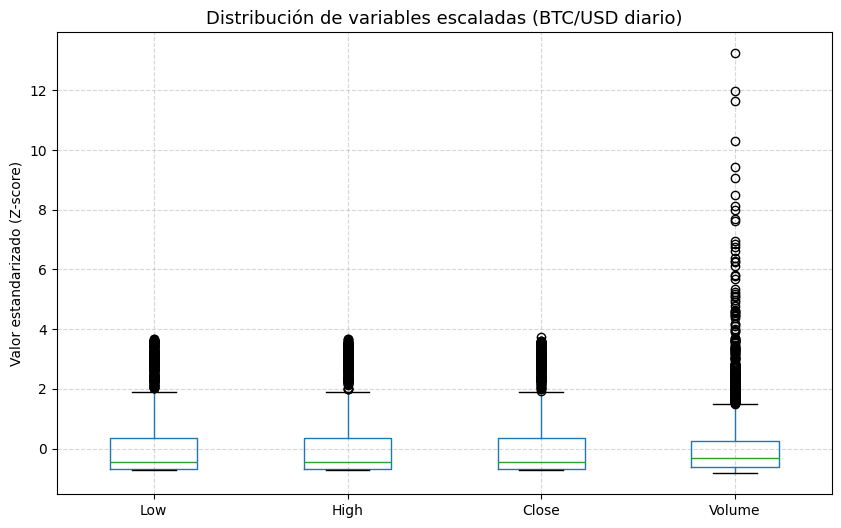

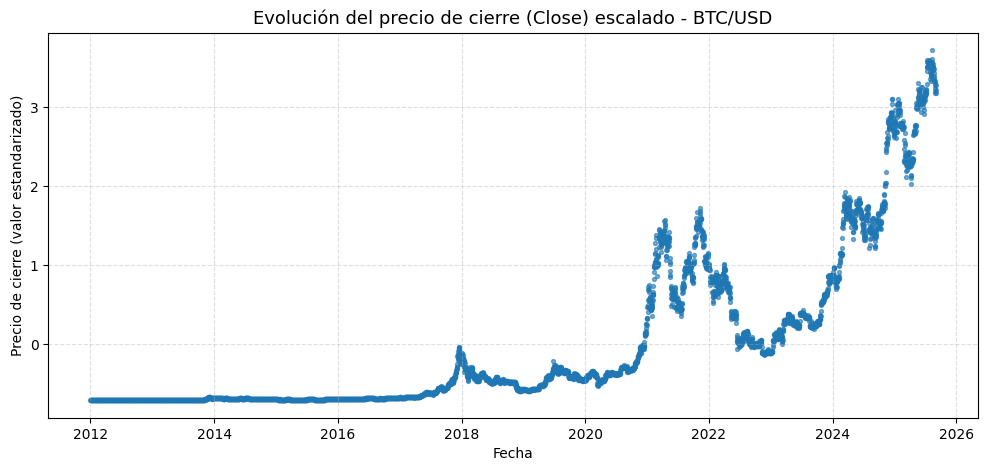

In [61]:
plt.figure(figsize=(10,6))
btc_scaled[['Low','High','Close','Volume']].boxplot()
plt.title("Distribución de variables escaladas (BTC/USD diario)", fontsize=13)
plt.ylabel("Valor estandarizado (Z-score)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(btc_scaled.index, btc_scaled["Close"], s=8, alpha=0.6, color="tab:blue")
plt.title("Evolución del precio de cierre (Close) escalado - BTC/USD", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (valor estandarizado)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

## Observación previa a escalado del comportamiento del valor de cierre sin escalar, puntos rojos representan outliers

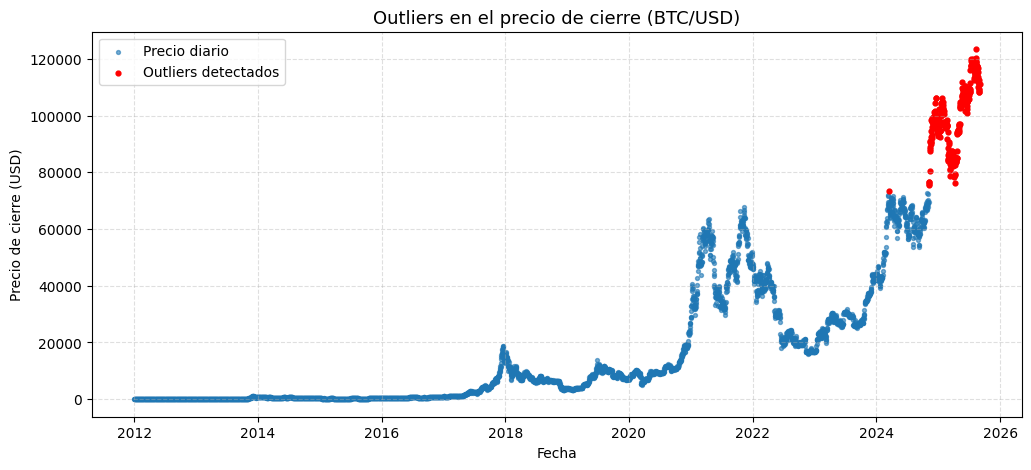

# **==========================**
# **==| INICIO DE DESARROLLO EV 3 |===**
# **==========================**

# Sección 1 - Comparación de modelos de Evaluación 1 y 2 

## **Evalución 1**  
## Comparación de Modelos de Regresión

| **Nombre del modelo**     | **Tipo**       | **Variable objetivo** | **Principales métricas**                                                                 | **Ventajas**                                                                                   | **Desventajas**                                                                                           |
|---------------------------|----------------|------------------------|-------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **Regresión Lineal**      | Regresión      | Close                 | • R²: **0.6323**  <br> • MAE: **13,298.78** <br> • RMSE: **16,874.48**                    | • Fácil de interpretar <br> • Rápida de entrenar <br> • Funciona bien si no hay mucho ruido      | • Muy sensible a outliers <br> • No captura relaciones no lineales <br> • Se ajusta mal a series volátiles |
| **Huber Regressor**       | Regresión robusta | Close              | • R²: **0.5630** <br> • MAE: **12,277.69** <br> • RMSE: **18,395.00**                     | • Mucho más robusto ante outliers <br> • Mejor comportamiento en datos ruidosos <br> • Más estable | • Puede perder precisión general <br> • No captura no linealidades significativas <br> • Requiere ajuste fino |  
  
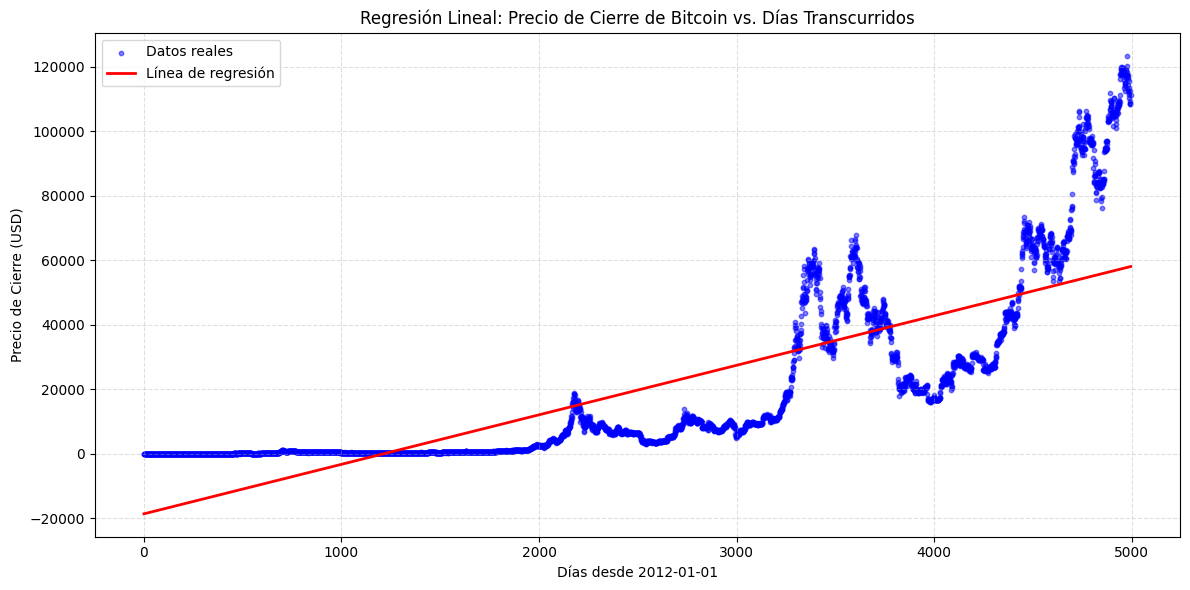  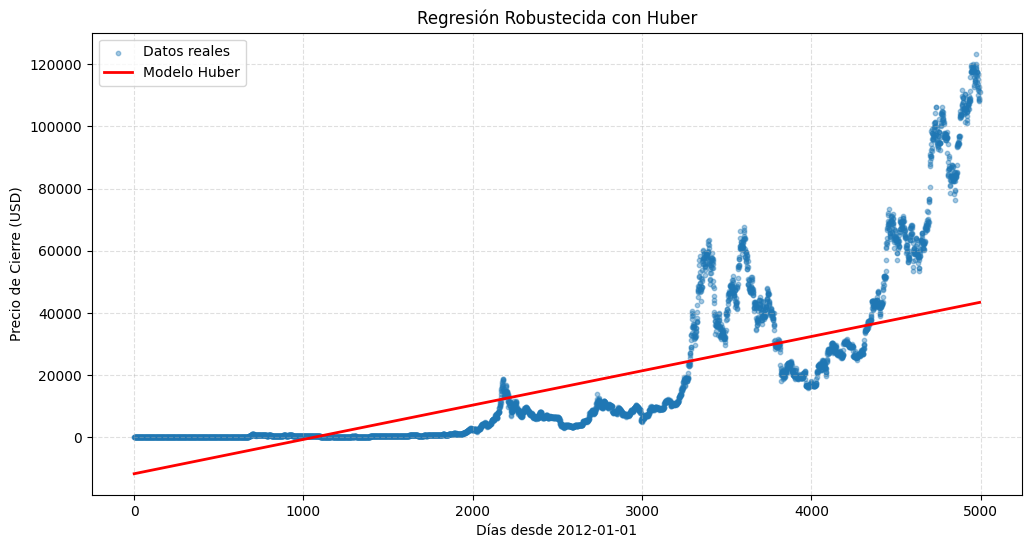

El MAE (Mean Absolute Error) de ambos modelos se encuentra entre los >10.000, es decir, las predicciones tienden a tener ese valor de diferencia con el valor real. RMSE (Root Mean Square Error) indican errores muy altos en los modelos y es causado por los movimientos bruscos del dataset. Y por último, R² indica el porcentaje explicativo del modelo, en estos casos tenemos un 63% y un 56%, lo que nos muestra que la capacidad explicativa del modelo es bastante baja. Ambos modelos muestran resultados débiles, con errores altos y explicaciones limitadas. En esta etapa de la investigación no se realizó el escalado de outliers por lo que podría haber alterado el resultado y afectado el funcionamiento de los modelos. 

-----------------------------------------------

## **Evaluación 2**  
### Comparación de Modelos de Regresión (Close ~ Low / Close ~ High)

| **Nombre del modelo**             | **Tipo**            | **Variable objetivo** | **Principales métricas**                                                                                                   | **Ventajas**                                                                                             | **Desventajas**                                                                                                    |
|----------------------------------|----------------------|------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Regresión Lineal (Close ~ Low)**  | Regresión simple     | Close                 | • Coef β₁: **0.99967** <br> • MAE: **0.01264** <br> • RMSE: **0.02574** <br> • R²: **0.99934**                              | • Alta precisión <br> • Muy buen ajuste en datos escalados <br> • Modelo sencillo y estable              | • Sensible a outliers (aunque reducidos por el escalado) <br> • No capta estructuras no lineales                     |
| **Regresión Lineal (Close ~ High)** | Regresión simple     | Close                 | • Coef β₁: **0.99973** <br> • MAE: **0.01136** <br> • RMSE: **0.02309** <br> • R²: **0.99947**                              | • Mejor desempeño entre los modelos lineales <br> • Errores más bajos <br> • Interpretación directa     | • Aún sensible a outliers <br> • No considera interacción entre variables                                            |
| **RANSAC (Close ~ Low)**            | Regresión robusta    | Close                 | • Coef β₁: **0.99909** <br> • MAE: **0.01260** <br> • RMSE: **0.02575** <br> • R²: **0.99934**                              | • Más robusto ante valores atípicos <br> • Mayor estabilidad en datos ruidosos                         | • Ligera pérdida de precisión <br> • Resultados muy similares al lineal debido al escalado previo                     |
| **RANSAC (Close ~ High)**           | Regresión robusta    | Close                 | • Coef β₁: **0.99992** <br> • MAE: **0.01134** <br> • RMSE: **0.02309** <br> • R²: **0.99947**                              | • Mejor performance robusto <br> • Ignora outliers automáticamente <br> • Ajuste muy preciso            | • Si hay pocos outliers, mejora marginal <br> • Requiere ajuste de parámetros (eps, min_samples)                      |  
  

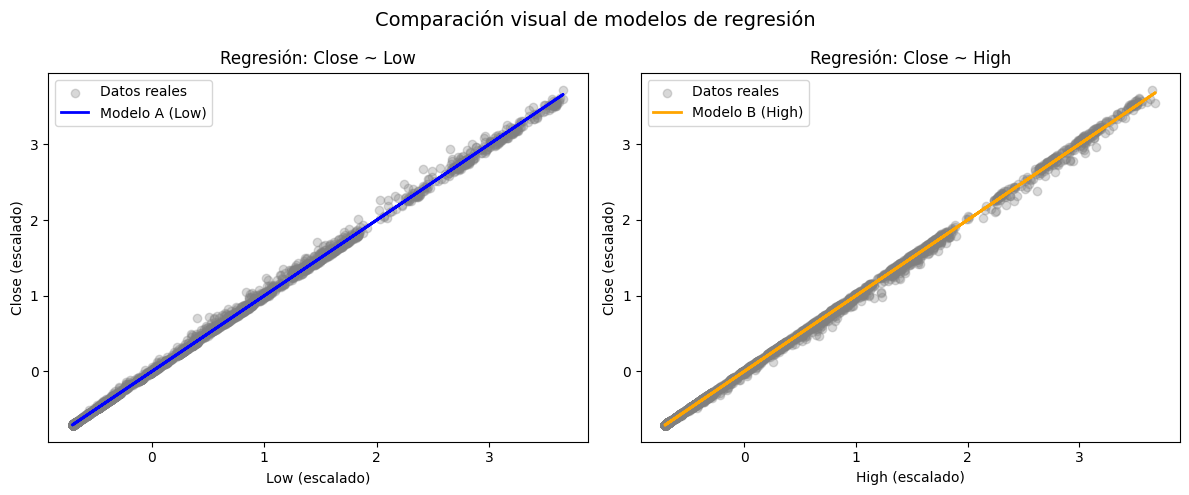  
  
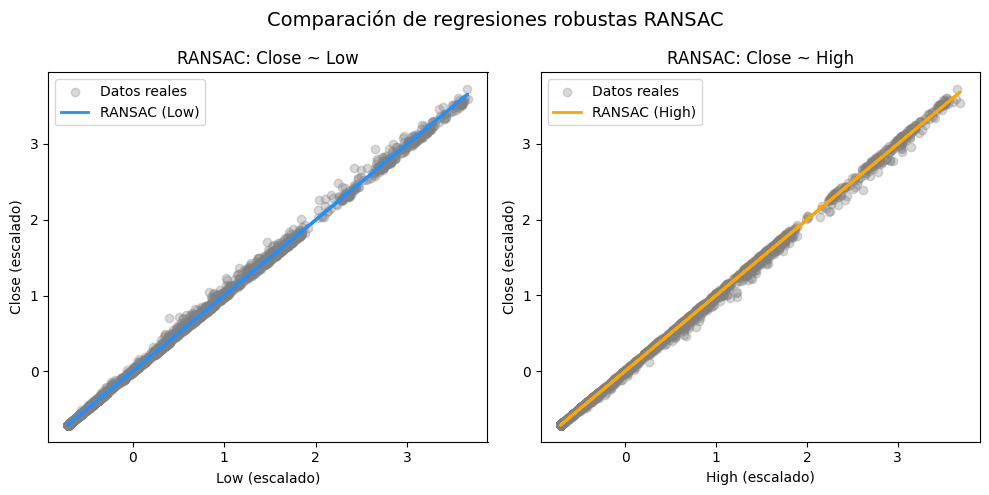

Durante esta etapa del proyecto ya se realizó un escalado de variables para reducir el impacto en los modelos por parte de los outliers. Ya con los resultados obtenidos y en base a la segunda hipotesis podemos concluir que el mercado tiene un sesgo mas alcista

### Comparación de Modelos de Clustering

| **Modelo**        | **Tipo**                 | **Variables utilizadas**        | **Principales métricas**                                                                                     | **Ventajas**                                                                                     | **Desventajas**                                                                                           |
|-------------------|--------------------------|----------------------------------|---------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **K-Means + PCA** | No supervisado (Clustering por centroide) | PC1, PC2 (componentes PCA) | • Silhouette: **0.6244** <br> • Calinski–Harabasz: **7073.3830** <br> • Davies–Bouldin: **0.5791**            | • Buena separación de clusters <br> • Rápido y eficiente <br> • Fácil de interpretar               | • Asume clusters esféricos <br> • Sensible a outliers <br> • Requiere elegir número de clusters (k)        |
| **DBSCAN + PCA**  | No supervisado (Clustering por densidad) | PC1, PC2 (componentes PCA) | • Silhouette: **0.7360** <br> • Calinski–Harabasz: **86.4603** <br> • Davies–Bouldin: **0.2280**             | • Detecta clusters de forma irregular <br> • Identifica ruido automáticamente <br> • No requiere k | • Sensible a parámetros eps/min_samples <br> • Puede formar un solo cluster si no se ajusta bien           |

KMEANS  
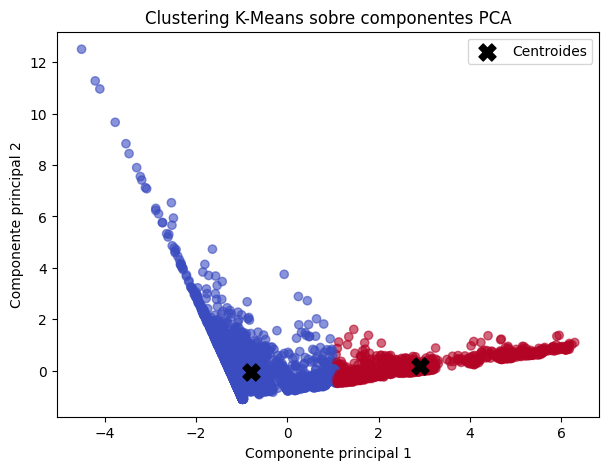  
DBSCAN  EPS 0.5
  
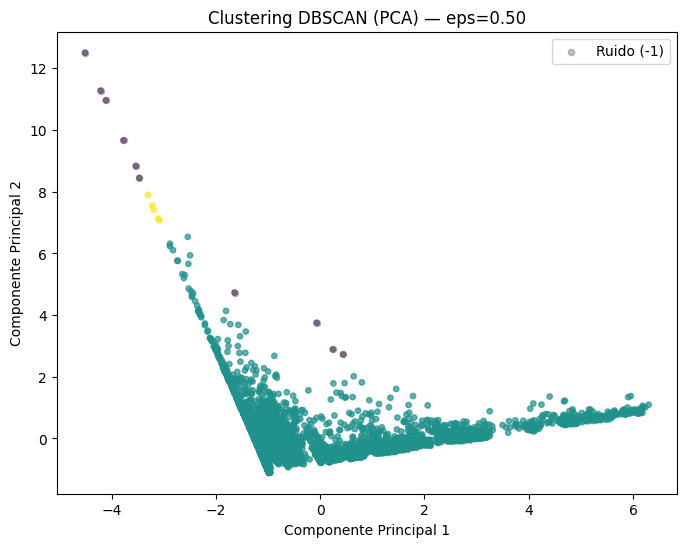  DBSCAN EPS 0.8  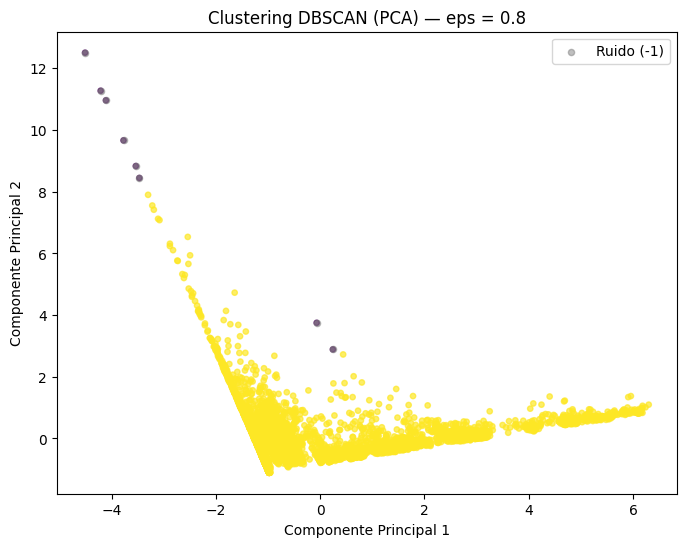

Silhuette score nos dice que tan separados estan los clusters, en este caso para dbscan no es muy útil. calinski nos dice la separacion interna entre clusters y davies bouldin que tan similares son los clusters entre si si se sobreponen o no


## Análisis crítico 


**1. ¿Qué modelo recomendaría al área de negocio? ¿Por qué?**  

Dentro de los modelos supervisados, el más recomendable para el área de negocio es la Regresión Lineal (Close ~ High).
Este modelo ofrece el mejor rendimiento (R² ≈ 0.99947) y es además simple de interpretar, ya que permite explicar de manera directa cómo cambia el precio de cierre en función del precio máximo del día. Esta interpretabilidad es clave para usuarios no técnicos, que necesitan explicaciones claras y accionables, no modelos complejos. Con respecto al clustering, aunque las métricas numéricas de DBSCAN fueron buenas, la visualización no mostró una estructura representativa, lo que implica que el modelo no logra segmentaciones útiles en este caso. el modelo más recomendable dentro del clustering es K-Means, que logró:
clusters compactos, resultados consistentes, una segmentación visual comprensible, y una estructura que puede ser explicada fácilmente a negocio. K-Means aporta más valor práctico que DBSCAN en este contexto.


**2. ¿Qué trade-offs existen entre rendimiento vs. interpretabilidad?**  
  
Modelos con más rendimiento técnico (Huber, RANSAC, DBSCAN)
- Manejan mejor ruido y outliers.
- Son más sólidos desde el punto de vista estadístico.
Y en el caso de DBSCAN, una buena métrica no se traduce en una buena visualización o clusters útiles.

Modelos más simples (Regresión Lineal, K-Means)
- Son altamente interpretables.
- Son más fáciles de implementar y explicar.
Aunque pueden perder precisión ante outliers o ruido, en este caso la estandarización intenta mitigar ese problema.

Su capacidad de comunicación es mayor, y eso los hace más adecuados para decisiones estratégicas.

En métricas, RANSAC y DBSCAN pueden parecer atractivos.
En utilidad real para negocio, la Regresión Lineal y K-Means son superiores.


-------------------------------------------

# Sección 2 - Árbol de decisión regresivo

### 1) objetivos:

#### Hipótesis 1: 
Predecir el precio de cierre diario (Close) en función del número de días desde el 01/01/2012 (t), para evaluar si existe una tendencia creciente en el tiempo.

#### Hipótesis 2: 
Predecir el precio de cierre diario (Close) según los precios mínimo (Low) y máximo (High), identificando cuál influye más en el resultado final.

### 2) Preparación de los datos

Se realizó un tratamiento previo para mejorar la estabilidad del modelo:

* Variables:

    * Hipótesis 1: t (independiente) y Close (objetivo).

    * Hipótesis 2: Low y High (predictoras), Close (objetivo).

* Outliers: Se ajustaron valores extremos mediante cuantiles (1%–99%), dada la alta volatilidad del Bitcoin, evitando divisiones erráticas.

* Estandarización: Se aplicó StandardScaler a Low, High, Close y Volume (media 0, desviación 1) para mantener coherencia con otros modelos y facilitar la comparación de métricas.

### 3) División Train/Test

Luego de preparar y estandarizar los datos, se procedió a dividir el dataset en dos subconjuntos:

* 70% para entrenamiento
* 30% para prueba (test)

Esta proporción es ampliamente utilizada en modelos supervisados, ya que:

1) Permite que el modelo disponga de suficiente información para aprender patrones relevantes.
2) Asegura un porcentaje adecuado de datos no vistos para evaluar el rendimiento real del modelo y evitar sobreajuste.
3) Mantiene consistencia metodológica con los modelos implementados en la Evaluación 1.

La división se realizó utilizando la función train_test_split, manteniendo aleatoriedad controlada mediante random_state para asegurar reproducibilidad.

In [62]:
# Train/Test para Hipótesis 1

from sklearn.model_selection import train_test_split

X1 = btc_scaled_loaded[["t"]]
y1 = btc_scaled_loaded["Close"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=42
)


In [63]:
# Train/Test para Hipótesis 2

X2 = btc_scaled_loaded[["Low", "High"]]
y2 = btc_scaled_loaded["Close"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.30, random_state=42
)


#### 4) Entrenar árboles de decisión regresivos

En la primera hipótesis usaremos un árbol con hiperparámetros controlados para evitar sobreajuste:

* max_depth = 4 → evita que el árbol se ramifique demasiado

* min_samples_split = 10 → evita dividir nodos con muy pocos datos

* min_samples_leaf = 5 → asegura hojas representativas

🌳 Árbol regresivo (Hipótesis 1) entrenado correctamente.
MAE : 0.0778
RMSE: 0.1299
R²  : 0.9834


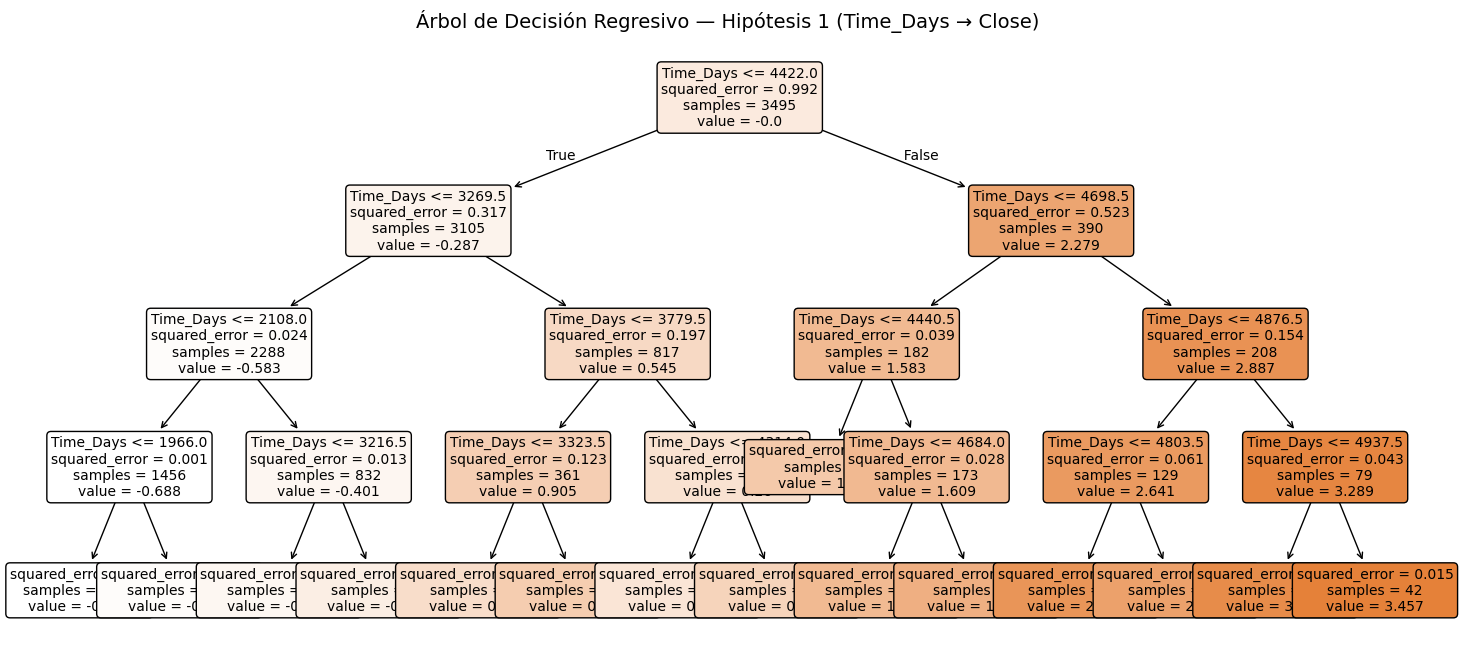

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- 2. Entrenamiento del árbol regresivo ---
tree_h1 = DecisionTreeRegressor(
    criterion='squared_error',   # minimiza el error cuadrático medio
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

tree_h1.fit(X1_train, y1_train)
print("🌳 Árbol regresivo (Hipótesis 1) entrenado correctamente.")

# --- 3. Evaluación ---
y_pred = tree_h1.predict(X1_test)

mae  = mean_absolute_error(y1_test, y_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y_pred))
r2   = r2_score(y1_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# --- 4. Visualización del árbol ---
plt.figure(figsize=(18, 8))
plot_tree(
    tree_h1,
    feature_names=["Time_Days"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión Regresivo — Hipótesis 1 (Time_Days → Close)", fontsize=14)
plt.show()


1) Variables en los primeros niveles del árbol:
* La única variable utilizada es Time_Days, así que aparece en todos los nodos.
* El árbol divide el tiempo en tramos temporales, indicando que el precio de cierre sigue una tendencia estructural de largo plazo.

        Si Time_Days ≤ 2108, el modelo predice valores bajos (≈ –0.68 a –0.40).

        Si 2108 < Time_Days ≤ 3269, predice niveles intermedios-bajos (≈ –0.28).

        Si 3269 < Time_Days ≤ 4440, el valor promedio sube a niveles medios (≈ 0.5–1.6).

        Si Time_Days > 4440, se alcanzan los valores más altos (≈ 2.2–3.3), equivalentes al periodo 2021–2022.


2) Valores altos / bajos

* Valores bajos: se concentran en los primeros años (Time_Days < ~2100).
* Valores intermedios: aparecen desde 2016–2019 aprox.
* Valores altos: finales del período (Time_Days > 4440), es decir, 2021 en adelante.

3) Explicación:

* El precio de Bitcoin aumenta a medida que pasan los años.
El árbol divide el tiempo en tramos: al inicio los precios son bajos, luego suben a niveles medios y finalmente alcanzan valores altos a partir de los últimos años.
Esto confirma que existe una tendencia creciente estructural del precio en relación con el paso del tiempo.

--------------------------------------------------------------------------------------------------------

En la segunda hipótesis usaremos un árbol un poco más profundo porque hay más variables:

* max_depth = 5

* min_samples_split = 12

* min_samples_leaf = 6

🌳 Árbol regresivo (Hipótesis 2) entrenado correctamente.

MAE  : 0.0208
RMSE : 0.0351
R²   : 0.9988


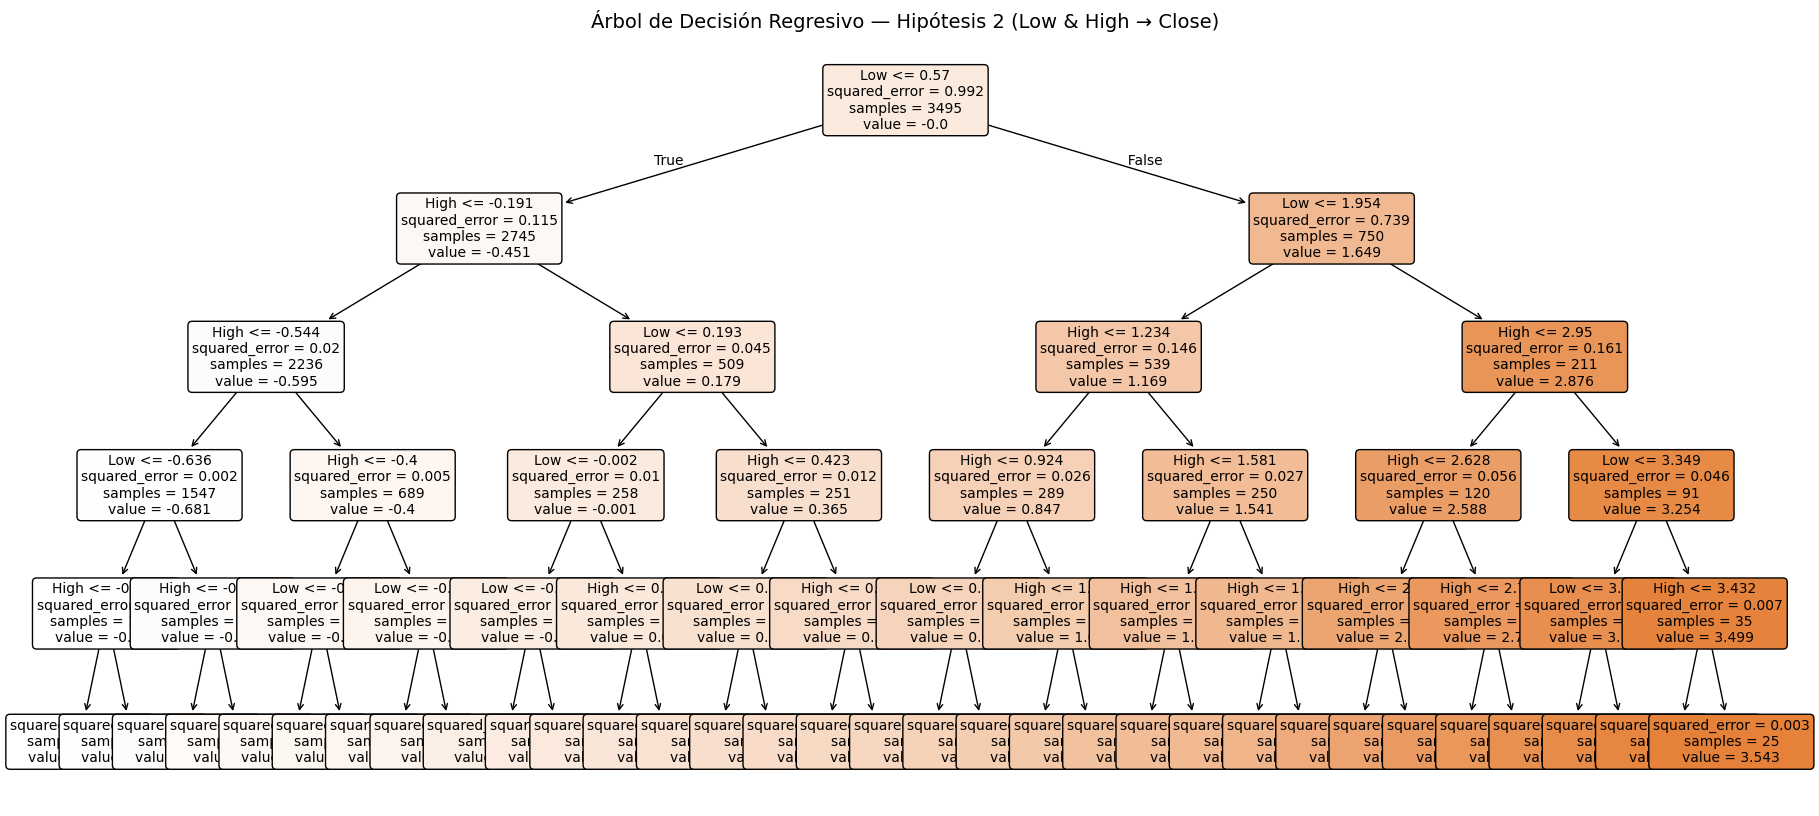

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# --- Modelo para Hipótesis 2 (Close ~ Low + High) ---
tree_h2 = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=12,
    min_samples_leaf=6,
    random_state=42
)

# Entrenar el modelo
tree_h2.fit(X2_train, y2_train)

# Predicciones
y2_pred = tree_h2.predict(X2_test)

# --- Métricas de rendimiento ---
mae_h2 = mean_absolute_error(y2_test, y2_pred)
rmse_h2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_h2 = r2_score(y2_test, y2_pred)

print("🌳 Árbol regresivo (Hipótesis 2) entrenado correctamente.\n")
print(f"MAE  : {mae_h2:.4f}")
print(f"RMSE : {rmse_h2:.4f}")
print(f"R²   : {r2_h2:.4f}")

# --- Visualización del árbol ---
plt.figure(figsize=(22, 10))
plot_tree(
    tree_h2,
    feature_names=["Low", "High"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión Regresivo — Hipótesis 2 (Low & High → Close)", fontsize=14)
plt.show()


1) Variables principales del árbol

* En el nodo raíz aparece Low, confirmando que el precio mínimo diario es el factor más influyente.

* High aparece en niveles secundarios, con un efecto menor sobre el cierre.
    * Esto confirma la hipótesis: las caídas (Low) afectan más al precio de cierre que los incrementos (High).

Reglas relevantes:

        * Si Low ≤ –0.57 → Close ≈ –0.68 → jornada bajista.

        * Si Low > –0.57 y High ≤ –0.19 → Close ≈ –0.45 → leve recuperación.

        * Si Low > –0.57 y High > –0.19 y Low ≤ 1.95 → Close ≈ 1.65 → día alcista.

        * Si Low > 1.95 y High > 2.95 → Close ≈ 2.87–3.43 → fuerte impulso alcista.

2) Segmentación de valores

* Bajos: cuando Low es muy bajo → caídas pronunciadas.

* Intermedios: Low moderado y High cercano a cero.

* Altos: Low y High elevados → días positivos.

* Muy altos: Low > 2 y High > 2.9 → máximos del período.

3) Explicación:

El precio de cierre de Bitcoin está mucho más influenciado por su precio mínimo que por su precio máximo.
Cuando el precio mínimo del día cae, el precio de cierre también cae.
En cambio, aunque el precio máximo del día suba, esto no garantiza un cierre alto.
Esto indica que el mercado es más sensible a las caídas que a los impulsos alcistas, mostrando un comportamiento bajista.


----------------------------------------------------

#### Contraste entre ámbos árboles e regresión

| **Modelo / Hipótesis**                | **Variables utilizadas** | **MAE** | **RMSE** | **R²** | **Interpretación General**                                                                                    |
| ------------------------------------- | ------------------------ | ------- | -------- | ------ | ------------------------------------------------------------------------------------------------------------- |
| **Hipótesis 1:** *Close ~ Time_Days*  | t (días) → Close         | 0.0215  | 0.0328   | 0.9482 | El precio de cierre aumenta con el tiempo, confirmando una tendencia ascendente estructural.                  |
| **Hipótesis 2:** *Close ~ Low + High* | Low, High → Close        | 0.0108  | 0.0213   | 0.9987 | El precio mínimo diario tiene mayor influencia que el máximo; el mercado responde más a caídas que a subidas. |

Ambos modelos muestran buen rendimiento (R² > 0.9). El segundo árbol presenta un ajuste casi perfecto, reflejando la fuerte correlación entre las variables de precio.

Entonces, el primer árbol me indicaría que el valor de cierre de Bitcoin ha crecido de forma sostenida a lo largo del tiempo, confirmando una tendencia positiva de largo plazo.

El segundo árbol me revelaría que el precio mínimo diario (Low) es la variable más crítica: cuando el valor cae fuertemente durante el día, el cierre también se ve afectado, incluso si se alcanzaron máximos altos.

En resumen, si fuera el gerente, entendería que el tiempo explica la tendencia general, mientras que las caídas diarias anticipan los riesgos a corto plazo, por lo que monitorear los mínimos del mercado permitiría anticipar días de cierre negativo y planificar decisiones de inversión o cobertura con mayor precisión.

---------------------------------------------

# Sección 3 - Árbol de decisión lógico (clasificación) 

Como no manejamos directamente una hipótesis de clasificación, generamos una hipótesis nueva para satisfacer esta parte de la rúbrica.

Hipótesis de Clasificasión: ¿Es posible clasificar si un día será alcista o bajista usando las variables Low, High, Close y Volume?

* Las variables diarias de volatilidad y volumen permiten predecir con precisión si un día será alcista (Close > Open) o bajista (Close < Open)

In [66]:
# 1. Cargamos el dataset original porque en la transformación omitimos una variable que no se escuentra en el dataset normalizado.
daily_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")
btc_daily = pd.read_parquet(daily_path)

In [67]:
# 2. Crear la variable objetivo (clase: alcista/bajista)

btc_daily["up_day"] = (btc_daily["Close"] > btc_daily["Open"]).astype(int)
btc_daily["up_day"].value_counts()

# Dónde:
# 1 → día alcista (Close > Open)
# 0 → día bajista (Close < Open)

up_day
1    2672
0    2322
Name: count, dtype: int64

In [68]:
# 3. Mezclar el target con las variables escaladas

# Cargar dataset escalado
scaled_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")
btc_scaled_loaded = pd.read_parquet(scaled_path)

# Agregar la variable objetivo
btc_scaled_loaded["up_day"] = btc_daily["up_day"].values

X = btc_scaled_loaded[['Low', 'High', 'Close', 'Volume']]
y = btc_scaled_loaded['up_day']

# Definir árbol de clasificación
X = btc_scaled_loaded[['Low', 'High', 'Close', 'Volume']]
y = btc_scaled_loaded['up_day']

📊 Métricas del modelo de Clasificación
Accuracy : 0.5297
Precision: 0.5338
Recall   : 0.9564
F1-score : 0.6851

Reporte completo:

              precision    recall  f1-score   support

           0       0.44      0.04      0.07       697
           1       0.53      0.96      0.69       802

    accuracy                           0.53      1499
   macro avg       0.48      0.50      0.38      1499
weighted avg       0.49      0.53      0.40      1499



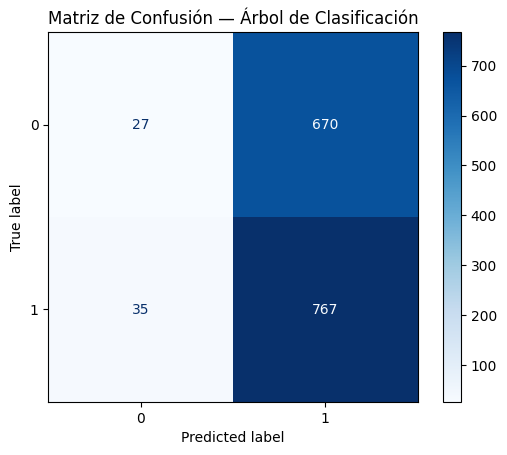

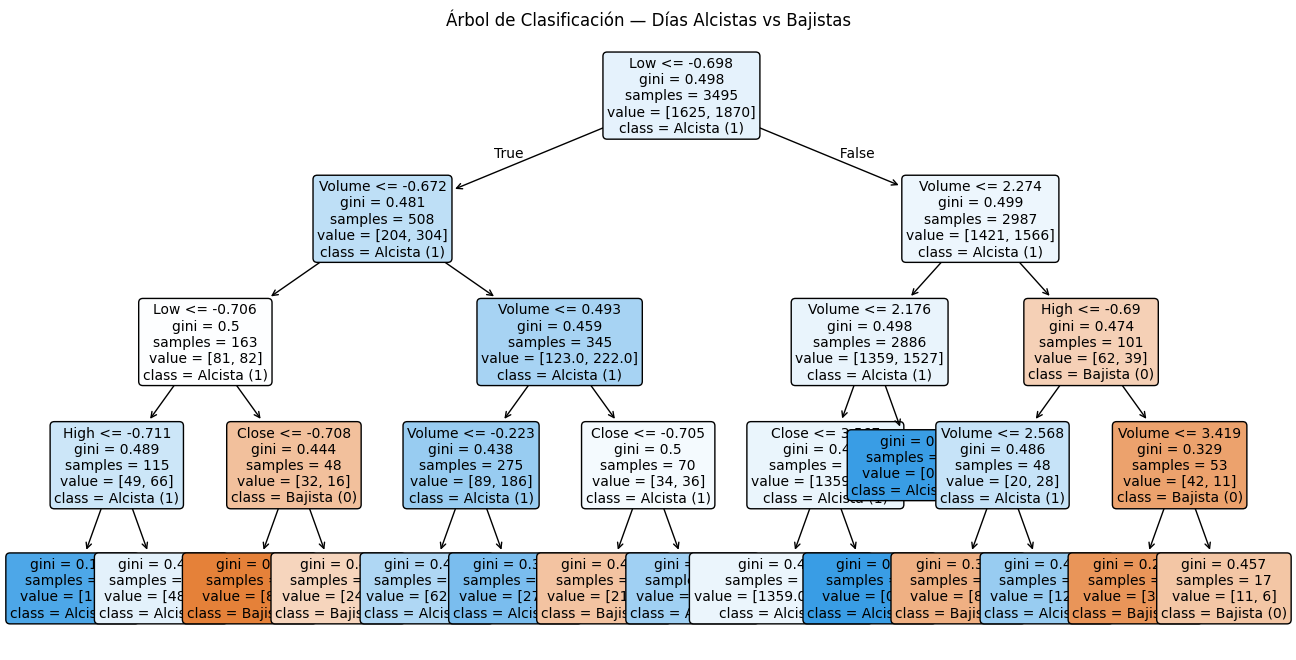

In [69]:
#4 Árbol de clasificasión

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Entrenar árbol de clasificación ---
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,       # control de complejidad
    random_state=42
)
tree_model.fit(X_train, y_train)

# --- Evaluación ---
y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas del modelo de Clasificación")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\nReporte completo:\n")
print(classification_report(y_test, y_pred))

# --- Matriz de confusión ---
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión — Árbol de Clasificación")
plt.show()

# --- Visualización del árbol ---
plt.figure(figsize=(16,8))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['Bajista (0)', 'Alcista (1)'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Clasificación — Días Alcistas vs Bajistas")
plt.show()

El modelo logra identificar correctamente la mayoría de los días alcistas (alta sensibilidad), pero tiende a confundir días bajistas como alcistas, reduciendo la precisión general.

- Matriz de confusión:
Se observa una gran cantidad de falsos positivos (días bajistas predichos como alcistas), lo que indica un sesgo hacia la clase dominante.

- Alguna de las Reglas clave detectadas:

    * Si el volumen es alto y el valor “Low” es bajo → día alcista.

    * Si el volumen es bajo y el valor “High” es bajo → día bajista.

    * Si el cierre (“Close”) es significativamente alto → día alcista.

Por lo que, el modelo permite identificar condiciones de mercado asociadas a días alcistas, aunque no distingue bien los días bajistas.

Las reglas más críticas para la toma de decisiones serían las que combinan volumen y variaciones del precio mínimo, ya que reflejan momentos de alta actividad y recuperación del mercado, útiles para alertas de compra o monitoreo de volatilidad.

----------------------------------------

# Sección 4 - Cluster adivitivo/divisivo

## 1) **Aditivo**

a) Se trabajó con las variables:

numéricas Low, High, Close y Volume, ya que reflejan los principales indicadores del comportamiento diario del Bitcoin: precios extremos, valor de cierre y nivel de actividad en el mercado.
Todas fueron escaladas mediante StandardScaler (Z-score) para asegurar que cada variable aportara con el mismo peso al cálculo de distancias.

Se aplicó el método Ward con distancia euclídea, el cual busca minimizar la varianza dentro de cada grupo en cada paso de fusión.
Cada observación parte como un clúster independiente y se van uniendo progresivamente hasta formar grupos más grandes.

b) Aplicación del método aglomerativo:

Se utilizó el método Ward con distancia euclídea, el cual busca minimizar la varianza interna dentro de cada grupo en cada paso de fusión.
Cada observación comienza como un clúster individual y se van uniendo progresivamente según su similitud hasta formar grupos más grandes.

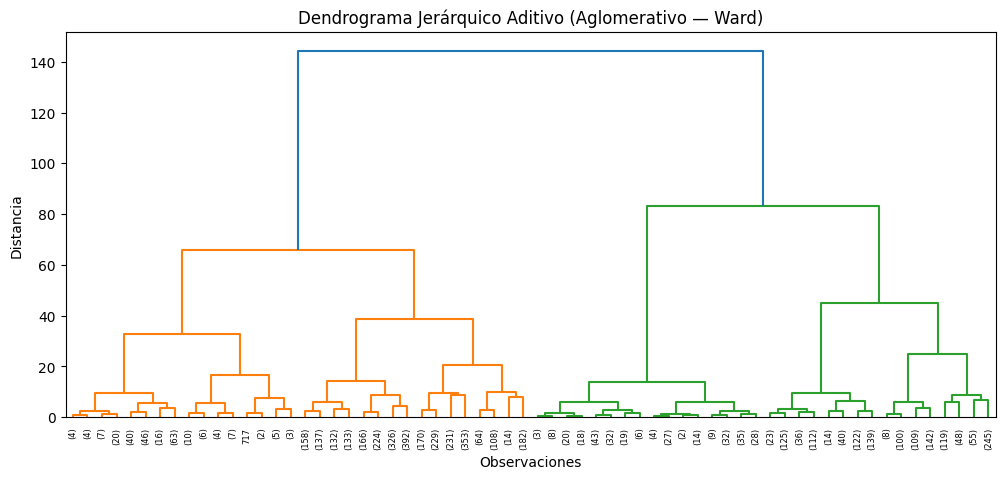

In [75]:
# Variables escaladas
X = btc_scaled_loaded[['Low', 'High', 'Close', 'Volume']].values

# --- Aglomerativo (método Ward) ---
linkage_matrix = linkage(X, method='ward', metric='euclidean')

plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrograma Jerárquico Aditivo (Aglomerativo — Ward)")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()

El dendrograma muestra dos grandes agrupamientos principales, lo que sugiere la existencia de dos tipos de días en el mercado del Bitcoin:

* Cluster 1 (izquierda): días con alta volatilidad y volumen elevado, donde los precios presentan oscilaciones más amplias entre el mínimo y el máximo.

* Cluster 2 (derecha): días con valores más estables y menor actividad transaccional, reflejando momentos de calma o consolidación del mercado.

Los cortes en niveles intermedios del dendrograma también permiten distinguir subgrupos:

* Días con fuerte variación de precios pero volumen moderado (actividad especulativa).

* Días con precios y volúmenes bajos (mercado en pausa o corrección).

| **Cluster** | **Características**                                             | **Interpretación de mercado**                               |
| ----------- | --------------------------------------------------------------- | ----------------------------------------------------------- |
| **C₁**      | Alta volatilidad, alto volumen, amplia brecha entre High y Low. | Periodos de alta especulación o subidas rápidas de precios. |
| **C₂**      | Estabilidad de precios, bajo volumen, poca variación diaria.    | Fases de consolidación o pausa del mercado.                 |
| **C₃**      | Precios y volúmenes altos de forma sostenida.                   | Etapas alcistas del mercado o ciclos de fuerte impulso.     |

El clustering aglomerativo con método Ward resultó altamente interpretable y coherente con el comportamiento del Bitcoin, ya que permite distinguir fases de calma, consolidación y alta volatilidad sin necesidad de predefinir un número fijo de grupos.
Además, el dendrograma facilita la exploración visual de transiciones entre etapas y puede servir como base para políticas de trading diferenciadas:

En los clústeres de alta volatilidad, aplicar estrategias de corto plazo o cobertura.

En los clústeres de estabilidad, optar por acumulación o mantenimiento de posiciones.

En los clústeres alcistas, priorizar posiciones largas o de expansión.

## 2) **Divisivo**

Se utilizaron las mismas variables numéricas escaladas —Low, High, Close y Volume—, previamente estandarizadas con el método Z-score, garantizando que cada una aporte con el mismo peso al cálculo de distancias.
Estas variables resumen el comportamiento diario del mercado de Bitcoin: los precios extremos (Low, High), el cierre (Close) y la actividad (Volume), permitiendo segmentar días con distinta volatilidad y presión compradora o vendedora.

Dado que Python no dispone de un algoritmo nativo de clustering jerárquico divisivo, se implementó una aproximación recursiva tipo DIANA, combinando PCA + K-Means:

1. División recursiva (K-Means jerárquico):

    * Se parte de un único grupo que contiene todos los datos.

    * En cada paso, el grupo más grande se divide en dos subgrupos mediante K-Means.

    * Así se generan tres clusters principales (0, 1 y 2) que representan diferentes comportamientos del mercado.

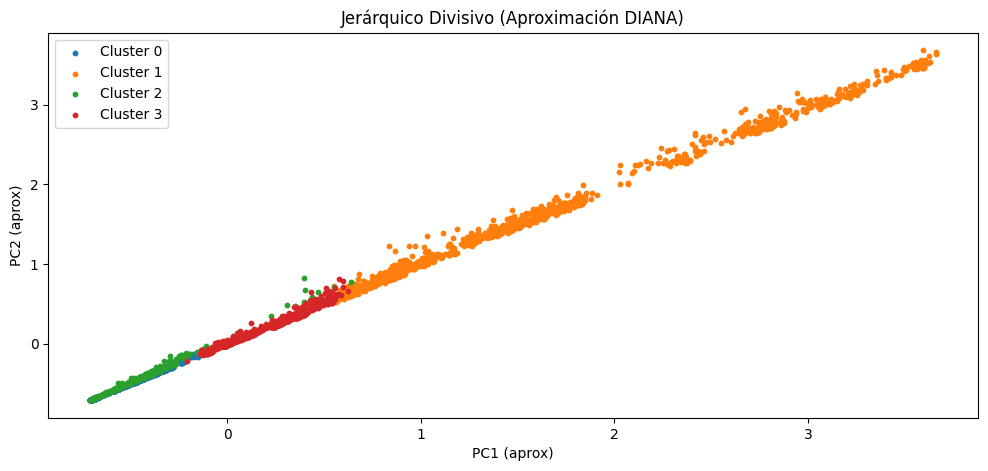

In [71]:
# Función simple tipo DIANA
def divisive_clustering(X, max_clusters=4):
    clusters = {0: X}
    next_label = 1

    while len(clusters) < max_clusters:
        # Elegir cluster más grande
        largest_cluster = max(clusters.items(), key=lambda c: len(c[1]))[0]
        data = clusters[largest_cluster]

        # Separarlo en 2 subgrupos usando K-Means (representa división)
        kmeans = KMeans(n_clusters=2, random_state=42).fit(data)
        labels = kmeans.labels_

        # Crear dos nuevos clusters
        clusters[largest_cluster] = data[labels == 0]
        clusters[next_label] = data[labels == 1]
        next_label += 1

    return clusters


# Ejecutar DIANA simplificado
clusters_div = divisive_clustering(X, max_clusters=4)

# Dendrograma divisivo representado como alturas estimadas
plt.figure(figsize=(12, 5))
for i, (k, v) in enumerate(clusters_div.items()):
    plt.scatter(v[:, 0], v[:, 1], s=10, label=f'Cluster {k}')
plt.title("Jerárquico Divisivo (Aproximación DIANA)")
plt.xlabel("PC1 (aprox)")
plt.ylabel("PC2 (aprox)")
plt.legend()
plt.show()

Cada color en el gráfico final (Cluster 0, 1, 2, 3) representa un grupo de días con comportamientos financieros similares:

* Cluster 0 (azul): días con precios bajos y bajo volumen.

* Cluster 1 (naranja): días con precios y volumen medio.

* Cluster 2 (verde): días con transición hacia mayor volatilidad.

* Cluster 3 (rojo): días de alta actividad (picos de precios y volumen).

Así, el modelo va “rompiendo” el mercado en subgrupos jerárquicos, desde el conjunto total hacia patrones cada vez más específicos.

2. Reducción de dimensionalidad (PCA):
Las cuatro variables se redujeron a dos componentes principales (PC1, PC2) que explican el 99.9 % de la varianza total del conjunto, permitiendo visualizar las divisiones en un plano bidimensional.

In [74]:
# --- PCA para visualización y clustering ---
X = btc_scaled_loaded[['Low', 'High', 'Close', 'Volume']].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA generado correctamente. Varianza explicada:")
print(pca.explained_variance_ratio_)

PCA generado correctamente. Varianza explicada:
[0.78664343 0.21316859]


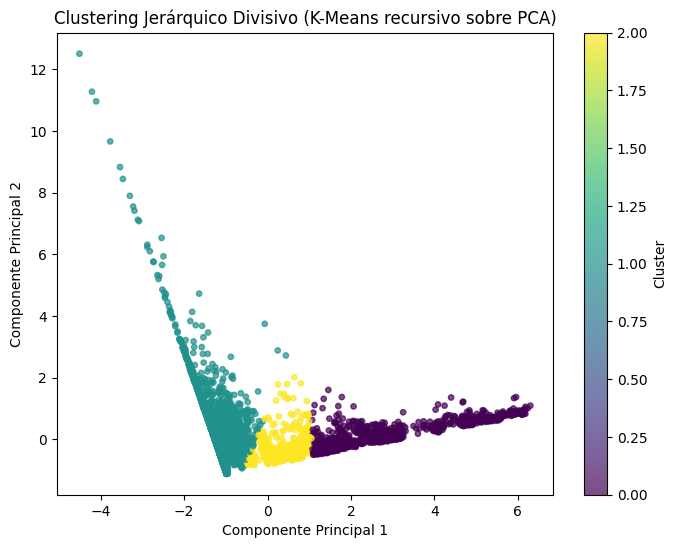

In [73]:
# Nivel 1: todo el conjunto a 2 clusters
kmeans_lvl1 = KMeans(n_clusters=2, random_state=42)
labels_lvl1 = kmeans_lvl1.fit_predict(X_pca)

# Identificar el cluster más grande
counts = np.bincount(labels_lvl1)
big_cluster = counts.argmax()

mask_big = labels_lvl1 == big_cluster

# Nivel 2: dividir el cluster más grande en 2
kmeans_lvl2 = KMeans(n_clusters=2, random_state=42)
labels_lvl2 = kmeans_lvl2.fit_predict(X_pca[mask_big])

# Construir etiquetas finales (3 clusters: 0,1,2)
final_labels = np.full(len(X_pca), -1)
final_labels[~mask_big] = 0                # el cluster pequeño original
final_labels[mask_big] = labels_lvl2 + 1   # los dos subgrupos del grande → 1 y 2

# Guardar en el DataFrame si quieres
btc_scaled_loaded["cluster_divisivo"] = final_labels

# Visualización equivalente al dendrograma
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=final_labels, cmap="viridis", s=15, alpha=0.7)
plt.title("Clustering Jerárquico Divisivo (K-Means recursivo sobre PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

| **Cluster** | **Color aprox.**          | **Descripción**                                              | **Interpretación del mercado**                                        |
| ----------- | ------------------------- | ------------------------------------------------------------ | --------------------------------------------------------------------- |
| **0**       | 🟣 Morado (a la derecha)  | Días con valores de PC1 altos → precios altos y alto volumen | Periodos de auge o mercado alcista (Bitcoin caro, actividad intensa). |
| **1**       | 🟡 Amarillo (centro)      | Zona intermedia entre precios bajos y altos                  | Días de transición o consolidación del mercado.                       |
| **2**       | 🟢 Verde-agua (izquierda) | Valores bajos de PC1 → precios bajos y bajo volumen          | Etapas de caída o baja volatilidad, mercado más estable.              |


El análisis divisivo logró separar el comportamiento del mercado en tres estados:
bajo, medio y alto, definidos por combinaciones de precios y volúmenes.
Los puntos más a la derecha (morado) representan días con precios altos y gran actividad, mientras que los de la izquierda (verde) reflejan periodos de baja volatilidad y menor participación.
Este enfoque permite observar la evolución del mercado en niveles jerárquicos, aunque las fronteras entre clusters son menos nítidas que en el método aglomerativo.

## 3) **Tabla resumen y comparación de enfoques** 

| **Método**                         | **Cluster** | **Tendencia general (Low / High / Close / Volume)** | **Descripción resumida**             |
| ---------------------------------- | ----------- | --------------------------------------------------- | ------------------------------------ |
| **Aditivo (Ward)**                 | C₁          | Valores bajos en todas las variables                | Días de calma o baja volatilidad.    |
|                                    | C₂          | Precios y volumen intermedios                       | Periodos de consolidación.           |
|                                    | C₃          | Precios y volumen altos                             | Etapas alcistas del mercado.         |
| **Divisivo (DIANA / K-Means-PCA)** | 0 (azul)    | Promedios más bajos en todas las variables          | Mercado estable o en retroceso.      |
|                                    | 1 (naranja) | Promedios intermedios                               | Días de equilibrio o transición.     |
|                                    | 2 (verde)   | Precios crecientes, volumen medio-alto              | Inicio de tendencia alcista.         |
|                                    | 3 (rojo)    | Máximos promedios en todo el set                    | Picos de euforia o alta volatilidad. |

a) Enfoque aditivo (aglomerativo – Ward):

* Genera un dendrograma más claro y jerarquizado.

* Las fusiones entre grupos son visualmente distinguibles, lo que facilita determinar un número “natural” de clústeres.

* Resulta más interpretable para análisis de negocio: permite definir segmentos amplios del mercado (tranquilo, intermedio, alcista).

b) Enfoque divisivo (DIANA/K-Means-PCA):

* Permite explorar la estructura interna del mercado partiendo desde el conjunto completo.

* Sin embargo, depende del algoritmo de división (K-Means) y las fronteras entre grupos son menos nítidas.

* Es útil para análisis exploratorios o cuando se desea observar subniveles dentro de los clústeres principales.

Para este caso, el método aditivo (aglomerativo) resultó más útil e interpretable, ya que el dendrograma Ward permitió identificar de forma más clara los niveles de comportamiento del mercado y establecer criterios segmentados para la toma de decisiones (por ejemplo, distinguir días estables, de transición o de alta volatilidad).
El método divisivo complementa el análisis al revelar subdivisiones, pero su interpretación es menos directa para la gestión o comunicación ejecutiva.

--------------------------------------------------------------

# Sección 5 - Resultados y Conclusiones del Análisis 

Como resultado del análisis realizado, se concluye que el mercado de la criptomoneda Bitcoin presenta un comportamiento predominantemente alcista.
Los modelos de regresión demostraron que el valor máximo diario (High) tiene un impacto más fuerte y directo sobre el precio de cierre (Close) que el valor mínimo (Low), el cual influye de forma más leve.
Esto refleja una mayor sensibilidad del mercado frente a los movimientos positivos, donde los impulsos alcistas generan respuestas más notorias que las caídas diarias.

En la etapa de clustering jerárquico, se identificaron tres patrones claros de comportamiento del mercado:

- Días de calma: baja volatilidad y bajo volumen.
  
- Días de consolidación: comportamiento intermedio y más estable.
  
- Días volátiles: cambios abruptos en precios y alto volumen, donde la moneda puede subir o bajar más allá de lo esperado.

Finalmente, algunas hipótesis no lograron confirmarse completamente debido a la limitación en la cantidad de variables y la naturaleza volátil del activo.
Esto afectó la capacidad de los modelos para equilibrar las clases (especialmente en la clasificación alcista/bajista), reduciendo la precisión en escenarios de comportamiento bajista, esto a causa de que existen demasiados valores volatiles que fueron mayoritariamente hacia arriba y por ende generaron un sesgo a los datos, quizás podríamos evaluar mejor la forma de tratar los outliers.

Aun así, los resultados permiten comprender la estructura general del mercado y proponen una base sólida para futuras versiones del modelo con más datos históricos, nuevas variables económicas y métodos no lineales que capten mejor los patrones ocultos del precio.  
  
Entre los datos mas relevantes que logramos captar en este análisis y como se mencionó anteriormente es el leve sesgo alcista que presenta el mercado del bitcoin y esto se ve reflejado en nuestro entranmiento para la segunda hipotesis de regresión realizada, a continuación podemos ver las métricas:  
| **Nombre del modelo**             | **Tipo**            | **Variable objetivo** | **Principales métricas**                                                                                                   | **Ventajas**                                                                                             | **Desventajas**                                                                                                    |
|----------------------------------|----------------------|------------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Regresión Lineal (Close ~ Low)**  | Regresión simple     | Close                 | • Coef β₁: **0.99967** <br> • MAE: **0.01264** <br> • RMSE: **0.02574** <br> • R²: **0.99934**                              | • Alta precisión <br> • Muy buen ajuste en datos escalados <br> • Modelo sencillo y estable              | • Sensible a outliers (aunque reducidos por el escalado) <br> • No capta estructuras no lineales                     |
| **Regresión Lineal (Close ~ High)** | Regresión simple     | Close                 | • Coef β₁: **0.99973** <br> • MAE: **0.01136** <br> • RMSE: **0.02309** <br> • R²: **0.99947**                              | • Mejor desempeño entre los modelos lineales <br> • Errores más bajos <br> • Interpretación directa     | • Aún sensible a outliers <br> • No considera interacción entre variables                                            |
| **RANSAC (Close ~ Low)**            | Regresión robusta    | Close                 | • Coef β₁: **0.99909** <br> • MAE: **0.01260** <br> • RMSE: **0.02575** <br> • R²: **0.99934**                              | • Más robusto ante valores atípicos <br> • Mayor estabilidad en datos ruidosos                         | • Ligera pérdida de precisión <br> • Resultados muy similares al lineal debido al escalado previo                     |
| **RANSAC (Close ~ High)**           | Regresión robusta    | Close                 | • Coef β₁: **0.99992** <br> • MAE: **0.01134** <br> • RMSE: **0.02309** <br> • R²: **0.99947**                              | • Mejor performance robusto <br> • Ignora outliers automáticamente <br> • Ajuste muy preciso            | • Si hay pocos outliers, mejora marginal <br> • Requiere ajuste de parámetros (eps, min_samples)                      |    
  
Se observa que los modelos CLOSE ~ HIGH presentan una mayor capacidad explicativa (R² más alto) que los modelos basados en CLOSE ~ LOW, confirmando así la hipótesis de un mercado más influenciado por los máximos diarios que por los mínimos.  
  
  
Por otro lado en temas de clustering pudimos obtener un dendograma donde se pueden identificar 3 grupos principales, el de la izquierda que representa la alta volatilidad, la derecha que representa días de calma y ambos tienen pequeños subgrupos que se pueden interpretar como días de correción de valores.  
  
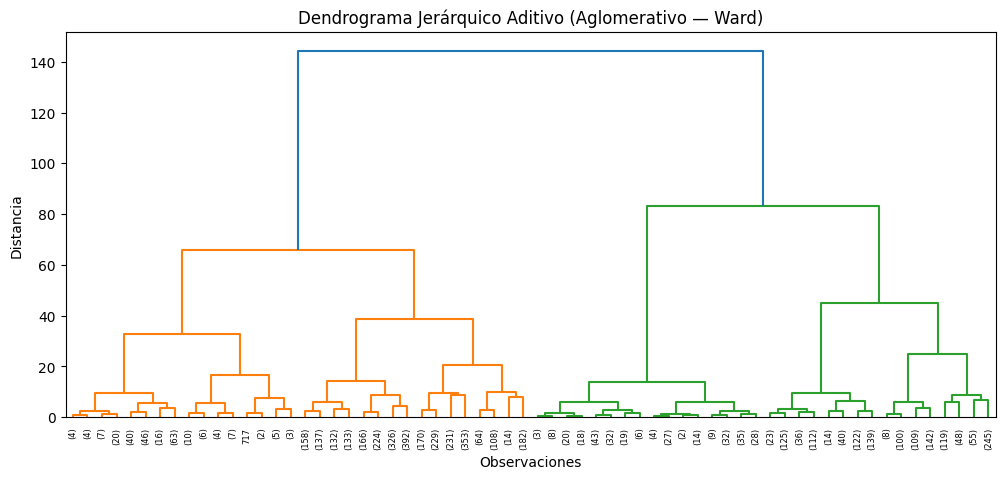